https://github.com/krishnaik06/Multicollinearity

## Multicollinearity In Linear Regression

In [1]:
import pandas as pd

In [4]:
import statsmodels.api as sm
df_adv = pd.read_csv('Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
X = sm.add_constant(X)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [6]:
X

,const,TV,radio,newspaper
1,1.0,230.1,37.8,69.2
2,1.0,44.5,39.3,45.1
3,1.0,17.2,45.9,69.3
4,1.0,151.5,41.3,58.5
5,1.0,180.8,10.8,58.4
...,...,...,...,...
196,1.0,38.2,3.7,13.8
197,1.0,94.2,4.9,8.1
198,1.0,177.0,9.3,6.4
199,1.0,283.6,42.0,66.2


In [9]:
## fit a OLS model with intercept on TV and Radio

model= sm.OLS(y, X).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           1.58e-96
Time:                        18:26:37   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
import matplotlib.pyplot as plt
X.iloc[:,1:].corr()

,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


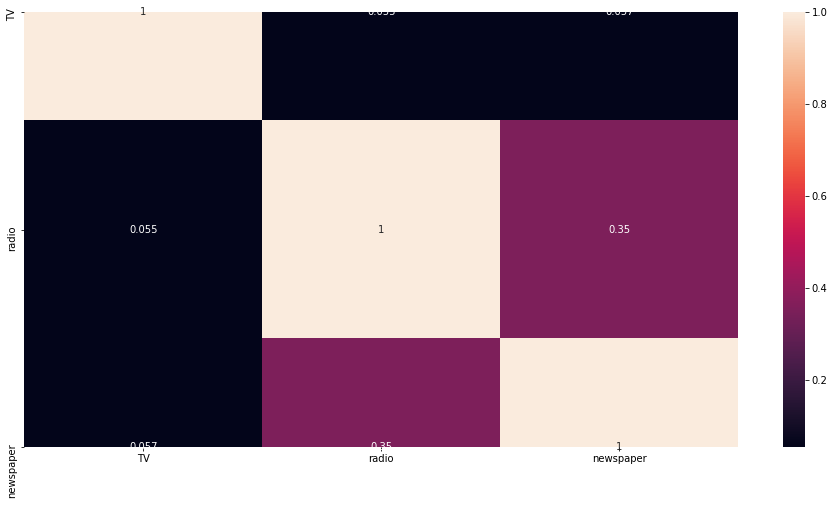

In [18]:
import seaborn as sns
plt.figure(figsize=(16,8))
sns.heatmap(X.iloc[:,1:].corr(), annot=True)
plt.show()

In [19]:
df_salary = pd.read_csv('Salary_Data.csv')
df_salary.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [20]:
X = df_salary[['YearsExperience', 'Age']]
y = df_salary['Salary']

In [21]:
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
model= sm.OLS(y, X).fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     323.9
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           1.35e-19
Time:                        18:35:58   Log-Likelihood:                -300.35
No. Observations:                  30   AIC:                             606.7
Df Residuals:                      27   BIC:                             610.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -6661.9872   2.28e+04     -0.292      0.773   -5.35e+04    4.02e+04
YearsExperience  6153.3533   2337.092      2.633      0.014    1358.037    1.09e+04
Age              1836.0136   1285.034      1.429      0.165    -800.659    4472.686
==============================================================================
Omnibus:                        2.695   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.975
Skew:                           0.456   Prob(JB):                        0.372
Kurtosis:                       2.135   Cond. No.                         626.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
X.iloc[:,1:].corr()

,YearsExperience,Age
YearsExperience,1.000000,0.987258
Age,0.987258,1.000000
